# SMS NTSC

In [1]:
import sys
import ctypes
import cv2
import skimage.io as io
import skimage.transform as T
import numpy as np
from scipy.misc import face
import matplotlib.pyplot as plt
from IPython import display
from moviepy.editor import VideoClip, VideoFileClip
from IPython.display import Video as IPythonVideo
from ntsc_py.sms_ntsc import SMS_NTSC, rgb32_888_to_rgb16_565, rgb16_565_to_rgb32_888

## Video Structures

In [2]:
class FrameIterator:
    def __init__(self, frames):
        self.i = 0
        self.frames = frames

    def __call__(self, *args, **kwargs):
        frame = self.frames[self.i]
        if self.i < len(self.frames) - 1:
            self.i = self.i + 1
        return frame

In [3]:
def save_frames(path, frames, fps=30):
    clip = VideoClip(FrameIterator(frames), duration=(len(frames) / fps))
    clip = clip.set_fps(fps)
    clip.write_videofile(path)

## Load Filter

In [4]:
h = SMS_NTSC(mode='composite', flicker=True)

In [5]:
h.sms_pixels.dtype, h.sms_pixels.shape

(dtype('uint16'), (240, 256, 1))

In [6]:
h.ntsc_pixels.dtype, h.ntsc_pixels.shape

(dtype('uint8'), (240, 602, 3))

### Lossy Encode RGB Image

In [7]:
H, W, C = h.sms_pixels.shape

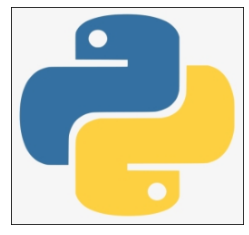

In [8]:
# img = T.resize(face(), (H, W), preserve_range=True).round().astype(int)
img = T.resize(io.imread('img/python.png'), (H, W), preserve_range=True).round().astype(int)[..., :3]
ax = plt.imshow(img)
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())

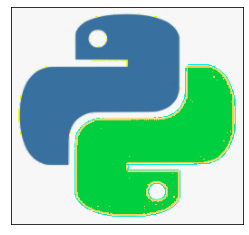

In [9]:
h.sms_pixels[:] = rgb32_888_to_rgb16_565(img)
ax = plt.imshow(rgb16_565_to_rgb32_888(h.sms_pixels))
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())

## Input Buffer

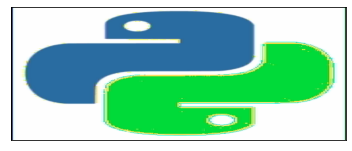

In [10]:
h.process()
ax = plt.imshow(h.ntsc_pixels)
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())
plt.show()

## Process Output

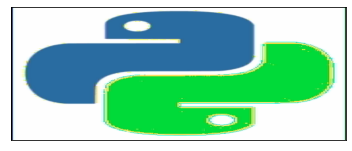

In [11]:
for i in range(60):
    h.process()
    display.clear_output(wait=True)
    ax = plt.imshow(h.ntsc_pixels)
    ax.axes.xaxis.set_major_locator(plt.NullLocator())
    ax.axes.yaxis.set_major_locator(plt.NullLocator())
    plt.show()

## Adjust Parameters

In [12]:
_ = cv2.putText(h.sms_pixels, 'SMS', (35, 90), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 0), 3)
_ = cv2.putText(h.sms_pixels, 'NTSC', (10, 190), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 0), 3)

In [13]:
frames = []
for i in range(400):
    h.setup(
        hue=i/200 - 1, 
        saturation=i/2 - 1, 
        contrast=i/200 - 1, 
        brightness=i/200 - 1, 
        sharpness=i/200 - 1, 
        gamma=i/200 - 1,
        artifacts=20 * i - 1,
        fringing=i/200 - 1,
        bleed=i/200 - 1,
    )
    # step the filter
    h.process()
    shape = list(h.ntsc_pixels.shape)
    shape[1] = shape[1] / 2
    output = T.resize(h.ntsc_pixels, shape, preserve_range=True)
    frames.append(output.round().astype('uint8'))
frames = frames[50:]

In [14]:
path = 'img/sms-ntsc.mp4'
save_frames(path, frames)
IPythonVideo(path, embed=True)

t:  16%|█▌        | 55/350 [00:00<00:00, 480.19it/s, now=None]

Moviepy - Building video img/sms-ntsc.mp4.
Moviepy - Writing video img/sms-ntsc.mp4



Moviepy - Done !
Moviepy - video ready img/sms-ntsc.mp4


In [15]:
video = VideoFileClip(path)
# video = video.subclip((0, 50), (1, 10))
video = video.set_fps(1)
# video = video.resize(0.5)
video.write_gif(path.replace('.mp4', '.gif'))

t:   0%|          | 0/12 [00:00<?, ?it/s, now=None]

MoviePy - Building file img/sms-ntsc.gif with imageio.
